In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv("mutationc.csv")

samples = data.shape[0]
mutations = data.shape[1] - 1
mut_per_sam = data.iloc[:,1:mutations].sum(axis=1)
sam_per_mut = data.iloc[:,1:mutations].sum()


Text(0, 0.5, 'Mutations per Sample')

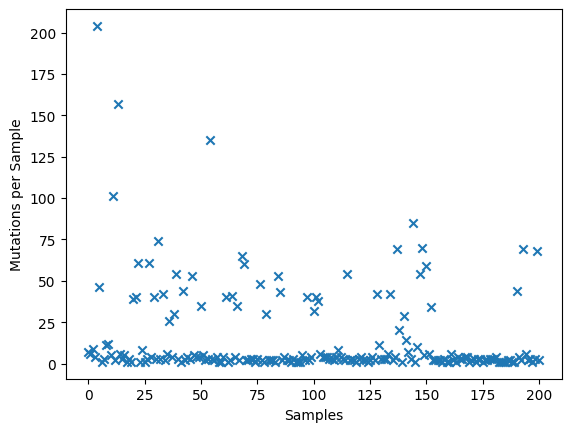

In [2]:
# scatter plot : mutations per sample / samples
plt.scatter(range(len(mut_per_sam)),mut_per_sam,marker='x')
plt.xlabel("Samples")
plt.ylabel("Mutations per Sample")

Text(0, 0.5, 'Samples per Mutation')

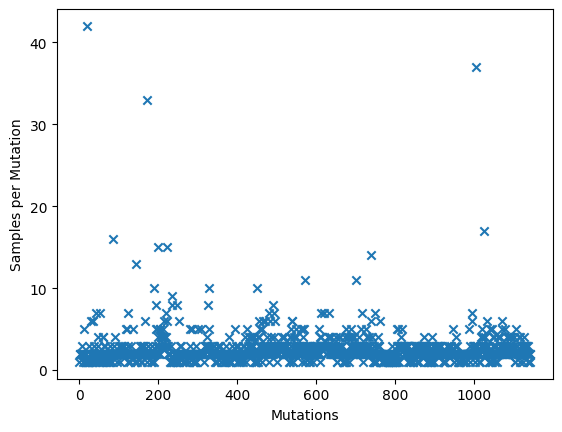

In [3]:
# scatter plot : samples per mutation / mutations
plt.scatter(range(len(sam_per_mut)),sam_per_mut,marker='x')
plt.xlabel("Mutations")
plt.ylabel("Samples per Mutation")

In [4]:
T = data.iloc[:,1:].sum().sort_values(ascending=False).head(10)
# print(f"{T}")

In [5]:
C_filter = data.iloc[:,0].str.contains(r"^C\d+$",regex=True)
C = data[C_filter].iloc[:,1:].sum().sort_values(ascending=False)
print(f"{C.head(10)}")

BRAF_GRCh37_7:140453136-140453136_Missense-Mutation_SNP_A-A-T               28
DRD5_GRCh37_4:9785349-9785349_3'UTR_SNP_G-G-C                               27
KRAS_GRCh37_12:25398284-25398284_Missense-Mutation_SNP_C-C-A_C-C-T_C-C-G    25
DRD5_GRCh37_4:9785421-9785421_3'UTR_SNP_G-G-T                               13
ZBTB20_GRCh37_3:114058003-114058003_Frame-Shift-Del_DEL_G-G--               13
KRAS_GRCh37_12:25398281-25398281_Missense-Mutation_SNP_C-C-T                11
DOCK3_GRCh37_3:51417604-51417604_Frame-Shift-Del_DEL_C-C--                  11
RNF43_GRCh37_17:56435161-56435161_Frame-Shift-Del_DEL_C-C--                 10
PGM5_GRCh37_9:70993145-70993145_Missense-Mutation_SNP_A-A-G                  8
RAB28_GRCh37_4:13485808-13485808_5'UTR_DEL_G-G--                             7
dtype: int64


In [ ]:
NC_filter = data.iloc[:,0].str.contains(r"^NC\d+$",regex=True)
NC = data[NC_filter].iloc[:,1:].sum().sort_values(ascending=False)
print(f"NC ---- \n{NC.head(10)}")

NC ---- 
KRAS_GRCh37_12:25398284-25398284_Missense-Mutation_SNP_C-C-A_C-C-T_C-C-G    17
DRD5_GRCh37_4:9785349-9785349_3'UTR_SNP_G-G-C                               10
TP53_GRCh37_17:7577538-7577538_Missense-Mutation_SNP_C-C-T                   7
TP53_GRCh37_17:7578406-7578406_Missense-Mutation_SNP_C-C-T                   7
RNF43_GRCh37_17:56435161-56435161_Frame-Shift-Del_DEL_C-C--                  6
TP53_GRCh37_17:7577539-7577539_Missense-Mutation_SNP_G-G-A                   6
TP53_GRCh37_17:7577094-7577094_Missense-Mutation_SNP_G-G-A                   6
APC_GRCh37_5:112162891-112162891_Nonsense-Mutation_SNP_C-C-T                 5
BRAF_GRCh37_7:140453136-140453136_Missense-Mutation_SNP_A-A-T                5
APC_GRCh37_5:112174631-112174631_Nonsense-Mutation_SNP_C-C-T                 4
dtype: int64


TypeError: 'int' object is not subscriptable

In [7]:
per_C = (C / data[C_filter].shape[0]).sort_values(ascending=False) * 100  # C_i / C where,
                    # C_i = number of cancer samples with mut i
                    # C is the total number of cancer samples
per_NC = (NC / data[NC_filter].shape[0]).sort_values(ascending=False) * 100 # NC_i / NC where,
                    # NC_i is the number of non-cancer samples with mut i 
                    # NC is the total number of non-cancer samples
print(f"%C -----\n{per_C.head(10)}\n\n")
print(f"%NC -----\n{per_NC.head(10)}\n\n")


%C -----
BRAF_GRCh37_7:140453136-140453136_Missense-Mutation_SNP_A-A-T               26.923077
DRD5_GRCh37_4:9785349-9785349_3'UTR_SNP_G-G-C                               25.961538
KRAS_GRCh37_12:25398284-25398284_Missense-Mutation_SNP_C-C-A_C-C-T_C-C-G    24.038462
DRD5_GRCh37_4:9785421-9785421_3'UTR_SNP_G-G-T                               12.500000
ZBTB20_GRCh37_3:114058003-114058003_Frame-Shift-Del_DEL_G-G--               12.500000
KRAS_GRCh37_12:25398281-25398281_Missense-Mutation_SNP_C-C-T                10.576923
DOCK3_GRCh37_3:51417604-51417604_Frame-Shift-Del_DEL_C-C--                  10.576923
RNF43_GRCh37_17:56435161-56435161_Frame-Shift-Del_DEL_C-C--                  9.615385
PGM5_GRCh37_9:70993145-70993145_Missense-Mutation_SNP_A-A-G                  7.692308
PLEKHA6_GRCh37_1:204228411-204228411_Frame-Shift-Del_DEL_C-C--               6.730769
dtype: float64


%NC -----
KRAS_GRCh37_12:25398284-25398284_Missense-Mutation_SNP_C-C-A_C-C-T_C-C-G    17.525773
DRD5_GRCh37_4:9785

In [8]:
C_sub_NC = (per_C - per_NC).sort_values(ascending=False).head(10)
C_div_NC = (per_C / per_NC).replace([np.inf, -np.inf], np.nan).sort_values(ascending=False).head(10)
print(f"%C-%NC -----\n{C_sub_NC}\n\n")
print(f"%C/%NC -----\n{C_div_NC}\n\n")

%C-%NC -----
BRAF_GRCh37_7:140453136-140453136_Missense-Mutation_SNP_A-A-T               21.768438
DRD5_GRCh37_4:9785349-9785349_3'UTR_SNP_G-G-C                               15.652260
ZBTB20_GRCh37_3:114058003-114058003_Frame-Shift-Del_DEL_G-G--               10.438144
DOCK3_GRCh37_3:51417604-51417604_Frame-Shift-Del_DEL_C-C--                   8.515067
DRD5_GRCh37_4:9785421-9785421_3'UTR_SNP_G-G-T                                8.376289
PLEKHA6_GRCh37_1:204228411-204228411_Frame-Shift-Del_DEL_C-C--               6.730769
RAB28_GRCh37_4:13485808-13485808_5'UTR_DEL_G-G--                             6.730769
SVIL_GRCh37_10:29760116-29760116_Frame-Shift-Del_DEL_C-C--                   6.730769
KRAS_GRCh37_12:25398284-25398284_Missense-Mutation_SNP_C-C-A_C-C-T_C-C-G     6.512688
KRAS_GRCh37_12:25398281-25398281_Missense-Mutation_SNP_C-C-T                 6.453212
dtype: float64


%C/%NC -----
XYLT2_GRCh37_17:48433967-48433967_Frame-Shift-Del_DEL_C-C--        6.528846
ZBTB20_GRCh37_3:11405

In [9]:

feature_table = pd.DataFrame({"T":T.head(10).to_dict().keys(),
                              "C":C.head(10).to_dict().keys(),
                              "NC":NC.head(10).to_dict().keys(),
                              "%C":per_C.head(10).to_dict().keys(),
                              "%NC":per_NC.head(10).to_dict().keys(),
                              "%C-%NC":C_sub_NC.head(10).to_dict().keys(),
                              "%C/%NC":C_div_NC.head(10).to_dict().keys()})
feature_table


,T,C,NC,%C,%NC,%C-%NC,%C/%NC
0,KRAS_GRCh37_12:25398284-25398284_Missense-Muta...,BRAF_GRCh37_7:140453136-140453136_Missense-Mut...,KRAS_GRCh37_12:25398284-25398284_Missense-Muta...,BRAF_GRCh37_7:140453136-140453136_Missense-Mut...,KRAS_GRCh37_12:25398284-25398284_Missense-Muta...,BRAF_GRCh37_7:140453136-140453136_Missense-Mut...,XYLT2_GRCh37_17:48433967-48433967_Frame-Shift-...
1,DRD5_GRCh37_4:9785349-9785349_3'UTR_SNP_G-G-C,DRD5_GRCh37_4:9785349-9785349_3'UTR_SNP_G-G-C,DRD5_GRCh37_4:9785349-9785349_3'UTR_SNP_G-G-C,DRD5_GRCh37_4:9785349-9785349_3'UTR_SNP_G-G-C,DRD5_GRCh37_4:9785349-9785349_3'UTR_SNP_G-G-C,DRD5_GRCh37_4:9785349-9785349_3'UTR_SNP_G-G-C,ZBTB20_GRCh37_3:114058003-114058003_Frame-Shif...
2,BRAF_GRCh37_7:140453136-140453136_Missense-Mut...,KRAS_GRCh37_12:25398284-25398284_Missense-Muta...,TP53_GRCh37_17:7577538-7577538_Missense-Mutati...,KRAS_GRCh37_12:25398284-25398284_Missense-Muta...,TP53_GRCh37_17:7577538-7577538_Missense-Mutati...,ZBTB20_GRCh37_3:114058003-114058003_Frame-Shif...,PIK3CA_GRCh37_3:178952085-178952085_Missense-M...
3,DRD5_GRCh37_4:9785421-9785421_3'UTR_SNP_G-G-T,DRD5_GRCh37_4:9785421-9785421_3'UTR_SNP_G-G-T,TP53_GRCh37_17:7578406-7578406_Missense-Mutati...,DRD5_GRCh37_4:9785421-9785421_3'UTR_SNP_G-G-T,TP53_GRCh37_17:7578406-7578406_Missense-Mutati...,DOCK3_GRCh37_3:51417604-51417604_Frame-Shift-D...,MICAL3_GRCh37_22:18300932-18300932_Frame-Shift...
4,RNF43_GRCh37_17:56435161-56435161_Frame-Shift-...,ZBTB20_GRCh37_3:114058003-114058003_Frame-Shif...,RNF43_GRCh37_17:56435161-56435161_Frame-Shift-...,ZBTB20_GRCh37_3:114058003-114058003_Frame-Shif...,RNF43_GRCh37_17:56435161-56435161_Frame-Shift-...,DRD5_GRCh37_4:9785421-9785421_3'UTR_SNP_G-G-T,UBQLN2_GRCh37_X:56591874-56591874_Frame-Shift-...
5,ZBTB20_GRCh37_3:114058003-114058003_Frame-Shif...,KRAS_GRCh37_12:25398281-25398281_Missense-Muta...,TP53_GRCh37_17:7577539-7577539_Missense-Mutati...,KRAS_GRCh37_12:25398281-25398281_Missense-Muta...,TP53_GRCh37_17:7577539-7577539_Missense-Mutati...,PLEKHA6_GRCh37_1:204228411-204228411_Frame-Shi...,BRAF_GRCh37_7:140453136-140453136_Missense-Mut...
6,KRAS_GRCh37_12:25398281-25398281_Missense-Muta...,DOCK3_GRCh37_3:51417604-51417604_Frame-Shift-D...,TP53_GRCh37_17:7577094-7577094_Missense-Mutati...,DOCK3_GRCh37_3:51417604-51417604_Frame-Shift-D...,TP53_GRCh37_17:7577094-7577094_Missense-Mutati...,RAB28_GRCh37_4:13485808-13485808_5'UTR_DEL_G-G--,DOCK3_GRCh37_3:51417604-51417604_Frame-Shift-D...
7,TP53_GRCh37_17:7578406-7578406_Missense-Mutati...,RNF43_GRCh37_17:56435161-56435161_Frame-Shift-...,APC_GRCh37_5:112162891-112162891_Nonsense-Muta...,RNF43_GRCh37_17:56435161-56435161_Frame-Shift-...,APC_GRCh37_5:112162891-112162891_Nonsense-Muta...,SVIL_GRCh37_10:29760116-29760116_Frame-Shift-D...,POLR2M_GRCh37_15:58006972-58006972_3'UTR_SNP_A...
8,DOCK3_GRCh37_3:51417604-51417604_Frame-Shift-D...,PGM5_GRCh37_9:70993145-70993145_Missense-Mutat...,BRAF_GRCh37_7:140453136-140453136_Missense-Mut...,PGM5_GRCh37_9:70993145-70993145_Missense-Mutat...,BRAF_GRCh37_7:140453136-140453136_Missense-Mut...,KRAS_GRCh37_12:25398284-25398284_Missense-Muta...,ZDHHC8_GRCh37_22:20130522-20130522_Frame-Shift...
9,TP53_GRCh37_17:7577094-7577094_Missense-Mutati...,RAB28_GRCh37_4:13485808-13485808_5'UTR_DEL_G-G--,APC_GRCh37_5:112174631-112174631_Nonsense-Muta...,PLEKHA6_GRCh37_1:204228411-204228411_Frame-Shi...,KRAS_GRCh37_12:25398285-25398285_Missense-Muta...,KRAS_GRCh37_12:25398281-25398281_Missense-Muta...,PCDH19_GRCh37_X:99662505-99662505_Frame-Shift-...


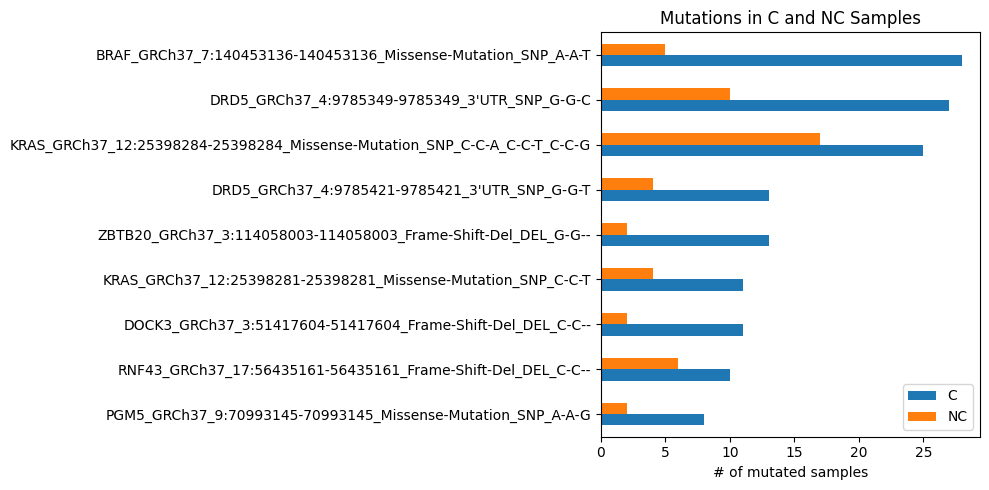

In [10]:
common_mutations = C.index.intersection(NC.index)
comp = pd.DataFrame({"C":C[common_mutations].head(9),"NC":NC[common_mutations].head(9)})
comp = comp.sort_values(by=["C", "NC"], ascending=True)
comp.plot(kind="barh", figsize=(10,5))
plt.title("Mutations in C and NC Samples")
plt.xlabel("# of mutated samples")
plt.tight_layout()